<a href="https://colab.research.google.com/github/UVARCteam/2023_5th_UVARC_workshop/blob/main/test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

epoch0:Done

e

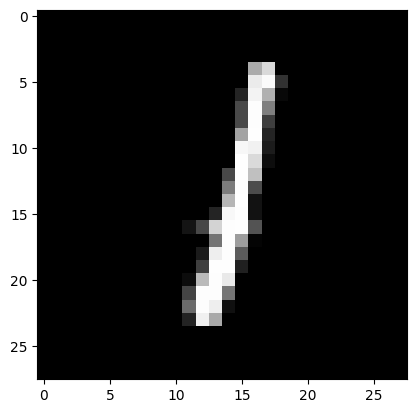

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from torch import nn
from torch import optim

mnist = fetch_openml('mnist_784', version=1, cache = True, as_frame = False)
mnist.target = mnist.target.astype(np.int8)

X = mnist.data / 255
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/7, random_state = 0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

def train(epoch):
  #model.train()
  for data, targets in loader_train:
    optimizer.zero_grad()
    outputs = model(data)
    loss = loss_fn(outputs, targets)
    loss.backward()
    optimizer.step()
    print("epoch{}:Done\n".format(epoch))

def test():
  model.eval()
  correct = 0
  with torch.no_grad():
    for data, targets in loader_test:
      outputs = model(data)
      _, predicted = torch.max(outputs.data,1)
      correct += predicted.eq(targets.data.view_as(predicted)).sum()
      data_num = len(loader_test.dataset)
      print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

for epoch in range(3):
  train(epoch)

test()
index = 2015

model.eval()
data = X_test[index]
output = model(data)
_,predicted = torch.max(output.data,0)
print("예측결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))